In [1]:
import pandas as pd
import numpy as np
#시각화를 위한 seaborn, plt import
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score as acc_sc
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

In [3]:
## 분류 알고리즘
from sklearn.tree import DecisionTreeClassifier      ## DecisionTree 

from sklearn.svm import SVC                              ## SVM

from sklearn.ensemble import GradientBoostingClassifier ## GradientBoosting

from lightgbm import LGBMClassifier                   ## LGBM

from xgboost import XGBClassifier, plot_importance

## 평가지표
import time
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report ## 혼동행렬
from sklearn.metrics import log_loss, accuracy_score, roc_curve
from sklearn.tree import export_graphviz

plt.style.use('default')

In [4]:
# 데이터 불러오기
heart_dt = pd.read_csv('/Users/yongjaegim/Desktop/심장질환/heart.csv')

# 심장 질환 dataset의 각 컬럼 설명
- **age** 
    - 나이
    <br><br/> 
- **sex** 
    - 성별 
        - 여자 = 0, 남자 = 1
    <br><br/>       
- **cp** 
    - 가슴 통증(chest pain) 종류
        - 0 : asymptomatic 무증상
        - 1 : atypical angina 일반적이지 않은 협심증
        - 2 : non-anginal pain 협심증이 아닌 통증
        - 3 : typical angina 일반적인 협심증
          <br><br/>
- **trestbps** (resting blood pressure) 
    - 휴식 중 혈압(mmHg)
    <br><br/>
- **chol** (serum cholestoral)
    - 혈중 콜레스테롤 (mg/dl)
    <br><br/>
- **fbs** (fasting blood sugar)
    - 공복 중 혈당 
        - 120 mg/dl 이하일 시 = 0, 초과일 시 = 1
        <br><br/>
- **restecg** (resting electrocardiographic) 
    - 휴식 중 심전도 결과 
        - 0: Estes' 기준에 의한 좌심실 비대 가능성이 있거나 확실함
         - showing probable or definite left ventricular hypertrophy by Estes' criteria
        - 1: 정상
        - 2: ST-T파 이상(T파 반전 및/또는 ST 상승 또는 하강 > 0.05mV) 
         - having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        <br><br/>
- **thalach** (maximum heart rate achieved)
    - 최대 심박수
    <br><br/>
- **exang** (exercise induced angina)
    - 활동으로 인한  협심증 여부 
        - 없음 = 0, 있음 = 1
        <br><br/>
- **oldpeak** (ST depression induced by exercise relative to rest)
    - 휴식 대비 운동으로 인한 ST 하강
    <br><br/>
- **slope** (the slope of the peak exercise ST segment)
    - 활동 ST 분절 피크의 기울기
        - 0: downsloping 하강
        - 1: flat 평탄
        - 2: upsloping 상승
        <br><br/>
- **ca** (number of major vessels colored by flouroscopy)
    - 형광 투시로 확인된 주요 혈관 수 
        - 0~3 개 
        <br><br/>
- **thal** (thalassemia) 
    - 지중해빈혈 여부
        - 0 = Null
        - 1 = normal 정상
        - 2 = fixed defect 고정 결함
        - 3 = reversable defect 가역 결함
        <br><br/>
- **target** 
    - 심장 질환 진단 여부
        - 0: < 50% diameter narrowing
        - 1: > 50% diameter narrowing

In [5]:
# thal과 ca에서 null값이 다른값으로 대체되었음

# EDA

In [6]:
# 맥os에서 한글화를 위한 작업
from matplotlib import rc

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [7]:
# test_dt에 heart_dt copy
test_dt =heart_dt.copy()

In [8]:
# 범주형 연속형 변수 리스트 생성
num_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cate_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope','ca', 'thal']

In [9]:
len(num_col)

5

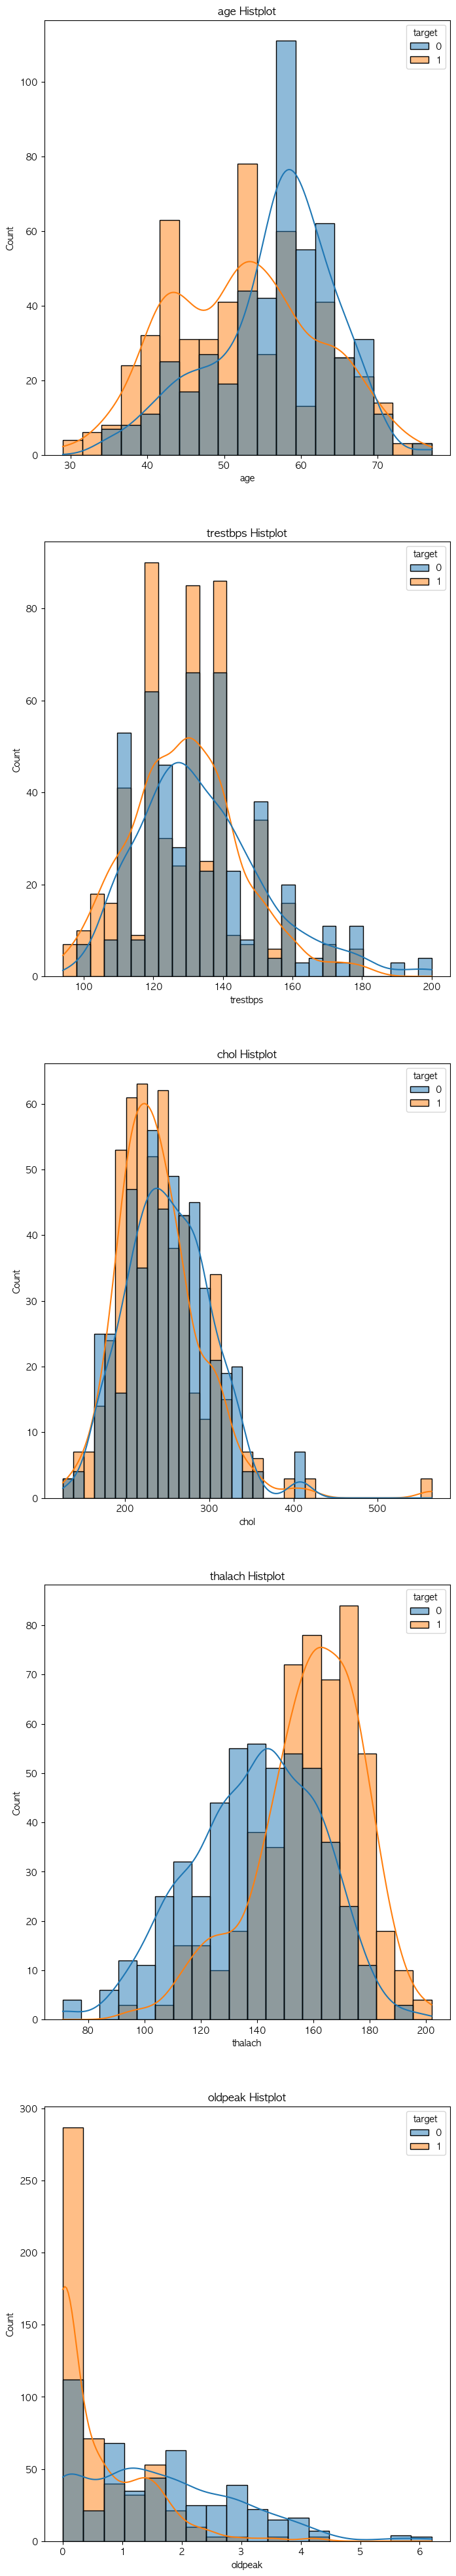

In [10]:
# 연속형 변수 시각화
plt.figure(figsize=(8,50))
for i in range(len(num_col)):
    plt.subplot(5,1,i+1)
    plt.title('{0} Histplot'.format(num_col[i]))
    sns.histplot(data = heart_dt, x = heart_dt['{0}'.format(num_col[i])], hue = heart_dt.target , kde = True)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


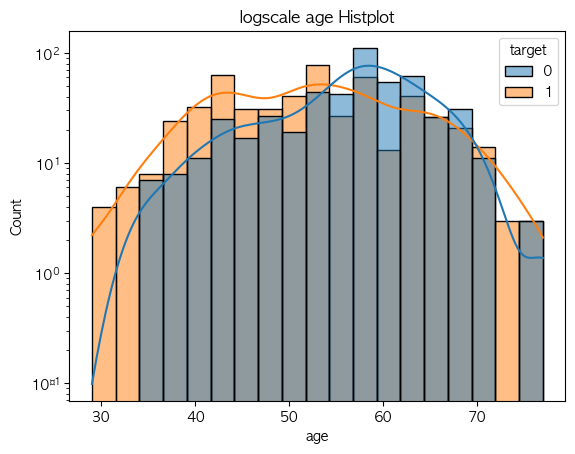

In [11]:
plt.title('logscale age Histplot'.format(num_col[i]))
sns.histplot(data = heart_dt, x = heart_dt.age, hue = heart_dt.target , kde = True)
plt.yscale('log')
# age 컬럼을 logscale을 통해 histplot 

<AxesSubplot:>

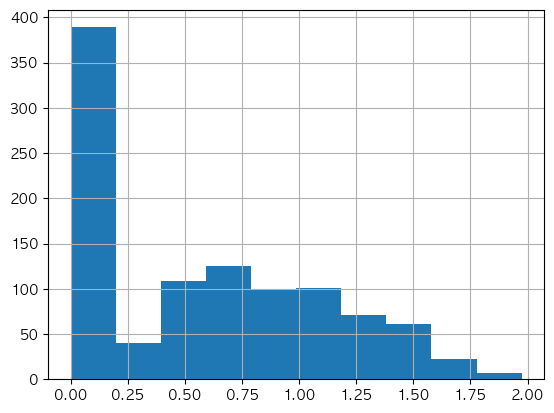

In [12]:
#우측 꼬리 분표로 이루어진 oldpeak log1p작업을 통해 정규 분포로 보기 위하여 변환 작업 
heart_dt.oldpeak = np.log1p(heart_dt.oldpeak)
heart_dt.oldpeak.hist()

In [13]:
#하지만 oldpeak의 대부분의 값이 0을 차지하고있어 정규분포를 이루지 못하고 있음
heart_dt.oldpeak.value_counts().head()

0.000000    329
0.788457     58
0.693147     51
0.470004     47
0.587787     44
Name: oldpeak, dtype: int64

<AxesSubplot:title={'center':'Modify oldpeak Histplot'}, xlabel='oldpeak', ylabel='Count'>

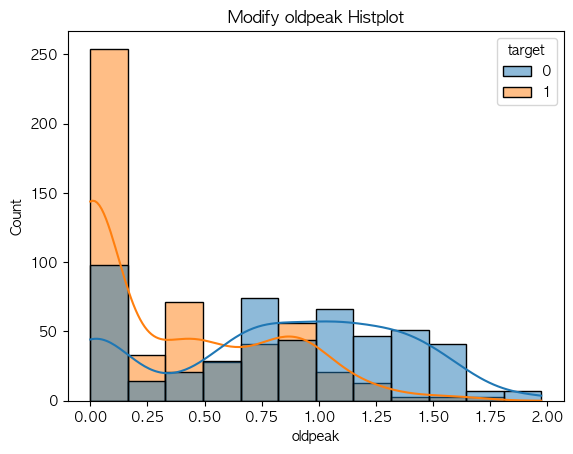

In [14]:
# Log1p작업을 통한 oldpeak의 histplot
plt.title('Modify oldpeak Histplot'.format(num_col[i]))
sns.histplot(data = heart_dt, x = heart_dt.oldpeak, hue = heart_dt.target , kde = True)

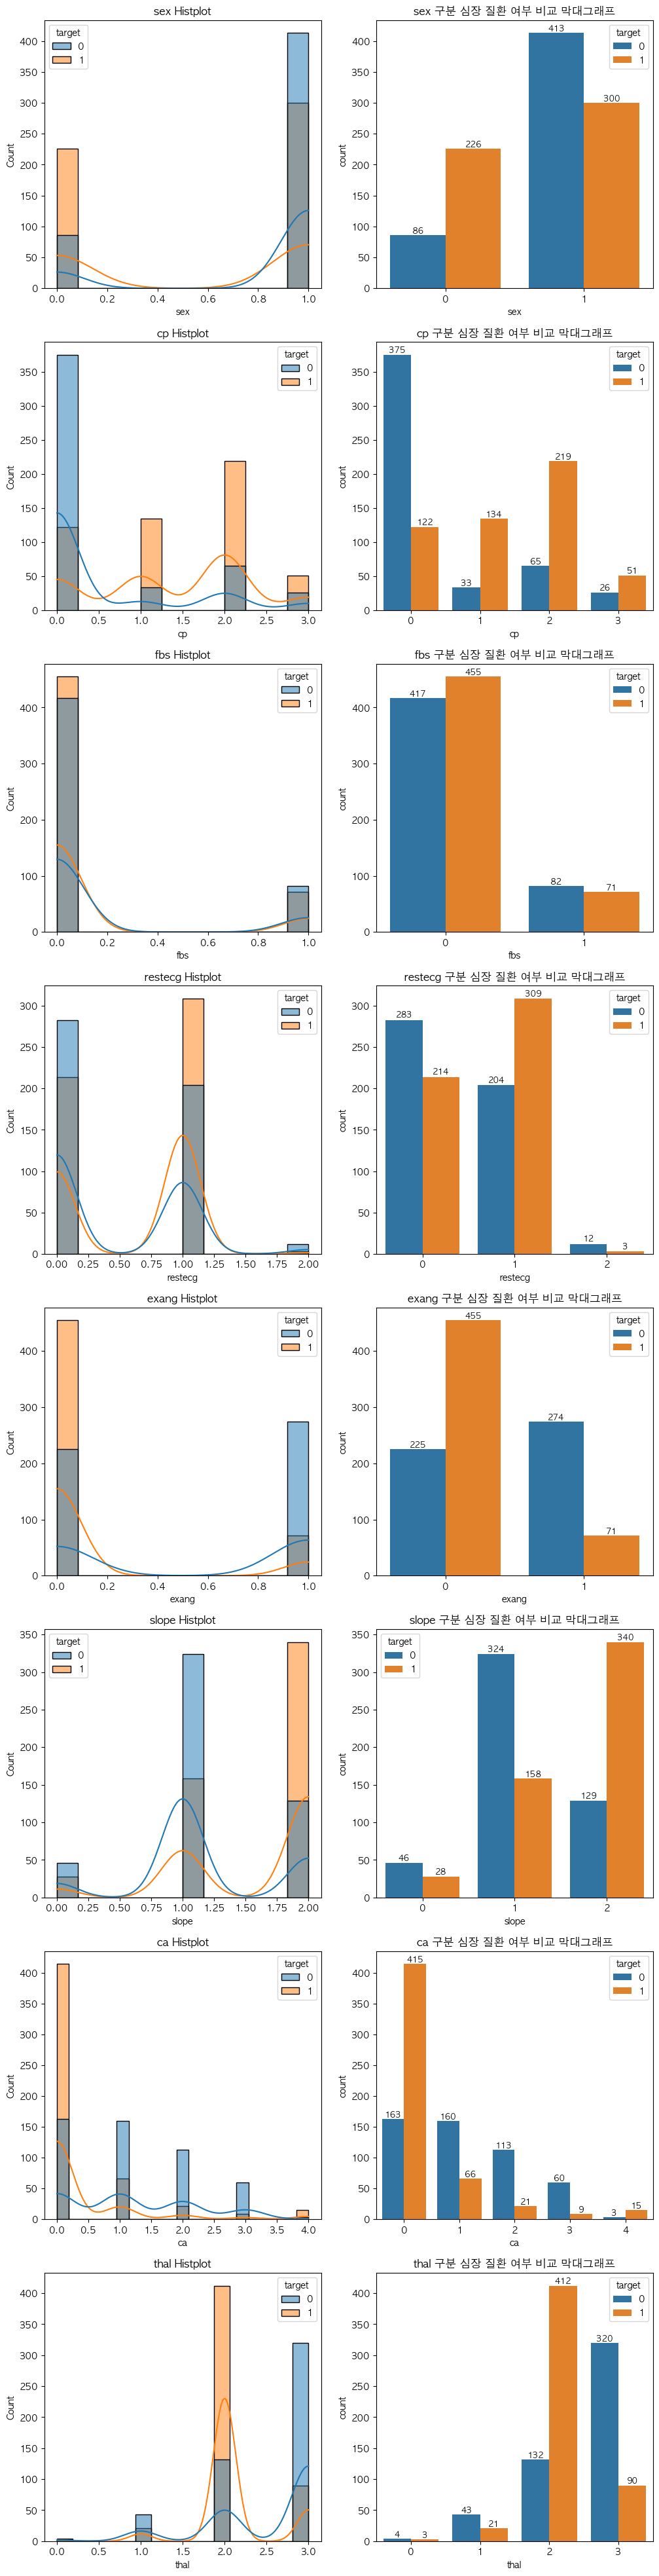

In [15]:
# 범주형 변수 시각화
plt.figure(figsize=(12,50))
for i in range(len(cate_col)): 
    plt.subplot(8,2,i+i+1)
    plt.title('{0} Histplot'.format(cate_col[i]))
    sns.histplot(data = heart_dt, x = heart_dt['{0}'.format(cate_col[i])], hue = heart_dt.target , kde = True)

    plt.subplot(8,2,i+i+2)
    plt.title('{0} 구분 심장 질환 여부 비교 막대그래프'.format(cate_col[i]))
    ax = sns.countplot(x=test_dt['{0}'.format(cate_col[i])], hue='target',data = heart_dt)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)

age = 50 ~ 60사이를 기준으로 나이가 많을수록 심장질환을 여부가 낮아짐  
sex = 여성이 남성보다 심장질환을 갖고 있을 여부가 큼  
cp = 무증상일 경우 심장 질환일 확률이 낮음   
restecg = 휴식중 심전도 0(좌심실 비대 가능성 높음) 보다 1(정상)일 경우 심장질환을 갖고 있을 확률이 높음  
thal = 최대 심박수가 150을 기준으로 넘을 경우 심장질환이 있을 확률이 높음  
exang = 활동으로 인한 협심증 여부로 없다면(0) 있는 것(1) 보다 심장 질환을 갖고 있을 확률이 더 큼  
oldpeak = 0에 가까울수록 심장 질환을 갖고 있을 확률이 큼  
slope = slope가 2일 경우 심장질환을 갖고 있을 확률이 큼  
ca = ca값이 0에 가까울수록 심장질환을 갖고 있을 확률이 큼  
thal = thal 값이 2면 심장 질환을 갖고 있을 확률이 큼   
  
trestbps = 의미있는 데이터로 보이지 않음    
chol = 의미있는 데이터로 보이지 않음   
fbs = 의미있는 데이터로 보이지 않음 


## EDA 정리
유의미한 데이터 sex, cp, restecg, thalach, exang, oldpeak, slope, ca, thal, age  
무의미한 데이터 trestbps, chol, fbs

# 데이터 전처리

In [16]:
heart_dt.isnull().sum() # null값 확인
# null은 존재 하지 않음

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
heart_dt.thal.value_counts() # 결측치 0    7개확인

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

In [18]:
# 결측치 처리된 0 의 값을 thal의 평균값을 반올림 한 2의 값으로 대체
heart_dt.thal = np.where(heart_dt.thal == 0, round(heart_dt.thal.mean()), heart_dt.thal)

In [19]:
heart_dt.thal.value_counts()

2    551
3    410
1     64
Name: thal, dtype: int64

In [20]:
heart_dt.ca.value_counts()
# ca는 0 ~ 3개 존재 null값들을 4라는 값으로 대체되었음(수정 필요)
# 4는 null값 대체 필요

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

In [21]:
# round(반올림)을 사용하여 값 대체
heart_dt.ca = np.where(heart_dt['ca'] == 4, round(heart_dt.ca.mean()), heart_dt.ca)

heart_dt.ca.value_counts()
# 4 에 있는 값을 평균값의 반올림 값(1)로 대체

0    578
1    244
2    134
3     69
Name: ca, dtype: int64

In [22]:
# sex를 첫 기준 두번째로 target을 잡아 나머지 컬럼들에 대한 평균값 비교
heart_dt.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12]].groupby([heart_dt.sex, heart_dt.target]).mean()

age        cp    trestbps        chol       fbs   restecg  \
sex target                                                                    
0   0       59.058140  0.174419  146.488372  276.732558  0.267442  0.534884   
    1       54.628319  1.323009  128.836283  255.641593  0.084071  0.588496   
1   0       56.050847  0.547215  131.527845  245.995157  0.142857  0.440678   
    1       50.736667  1.420000  129.553333  229.933333  0.173333  0.606667   

               thalach     exang   oldpeak     slope        ca      thal  
sex target                                                                
0   0       142.348837  0.581395  0.900790  0.965116  1.313953  2.500000  
    1       154.057522  0.106195  0.366531  1.579646  0.300885  2.026549  
1   0       138.460048  0.542373  0.809266  1.208232  1.104116  2.566586  
    1       161.996667  0.156667  0.347399  1.603333  0.273333  2.210000

In [23]:
heart_dt.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [24]:
heart_dt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,0.693147,2,2,3,0
1,53,1,0,140,203,1,0,155,1,1.410987,0,0,3,0
2,70,1,0,145,174,0,1,125,1,1.280934,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.000000,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.064711,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.000000,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,1.335001,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,0.693147,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.000000,2,0,2,1


<AxesSubplot:>

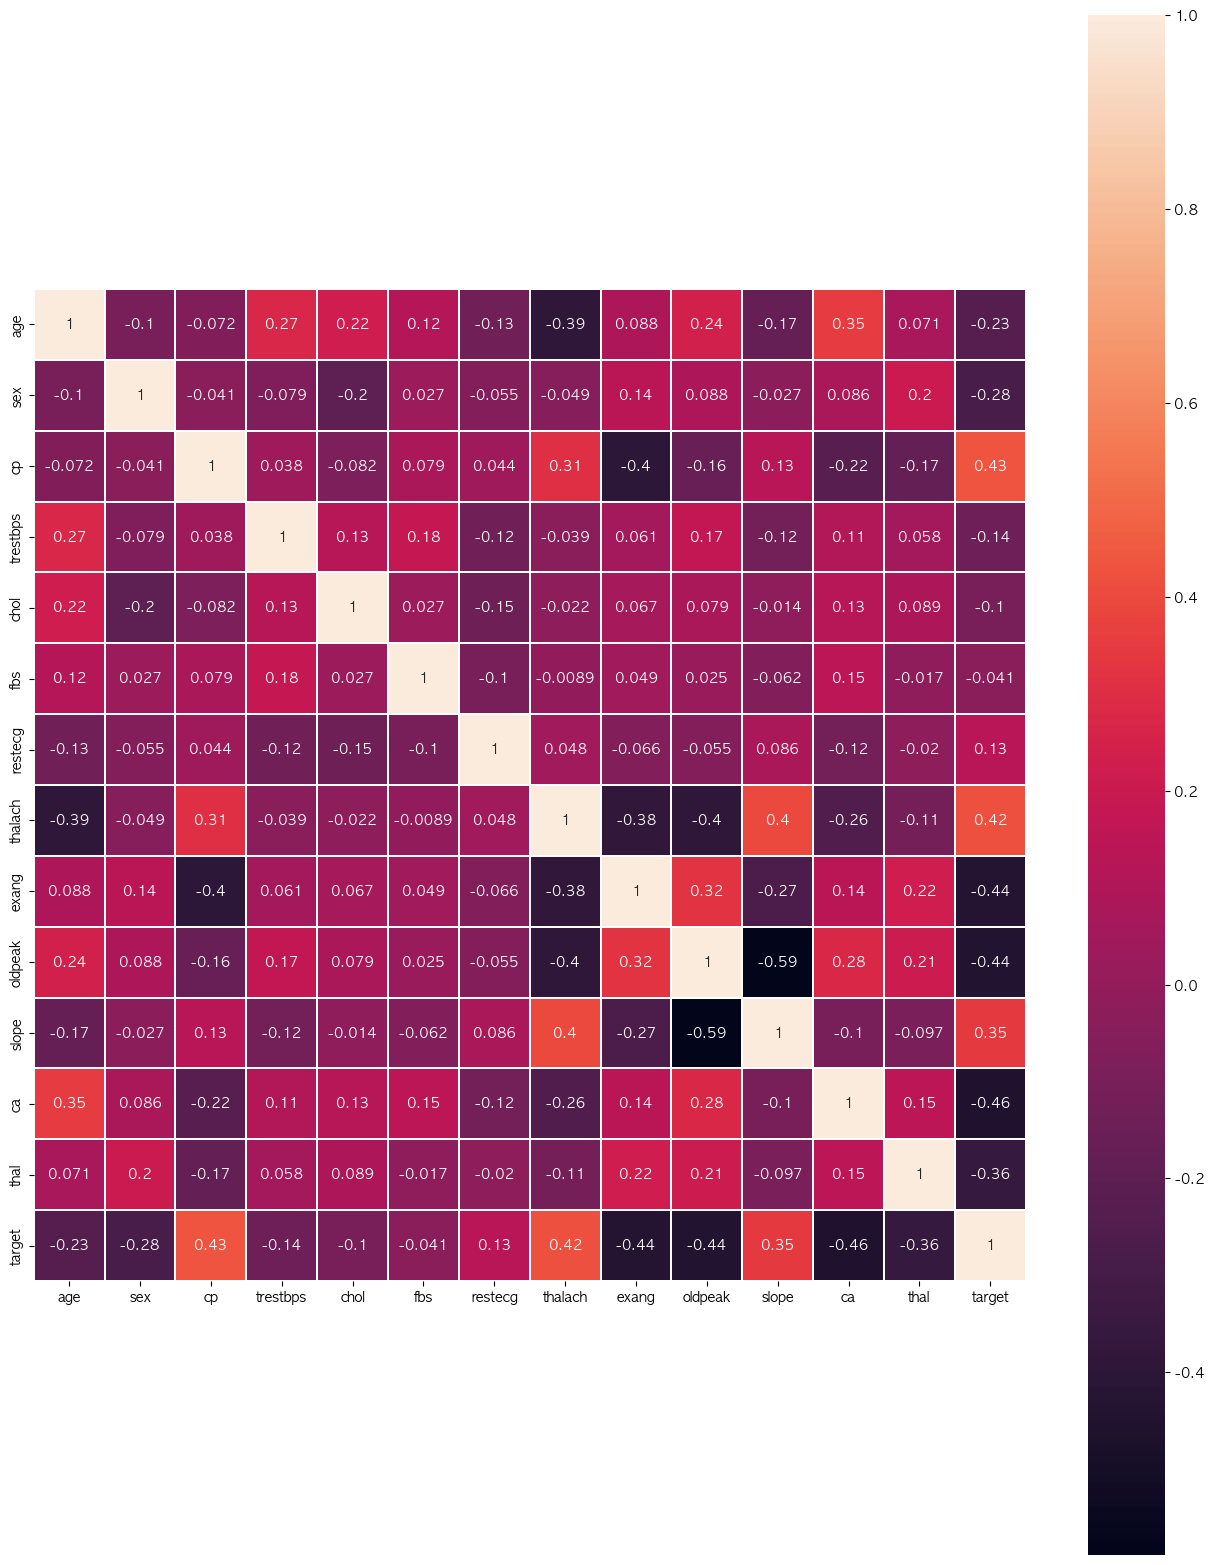

In [25]:
plt.figure(figsize=(16,20))
sns.heatmap(heart_dt.corr(), linewidths = 0.1, vmax = 1.0, square = True, linecolor = "white", annot = True)

In [26]:
# 연속형 변수들에 대한 정규화 StandardScaler
# trestbps, chol, thalach, oldpeak, age, trestbps
numeric_col = ['age','trestbps','thalach','oldpeak','chol']
scaler = StandardScaler()
heart_dt[numeric_col] = scaler.fit_transform(heart_dt[numeric_col])
heart_dt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,0.206584,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.567082,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.320597,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-1.107114,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.910796,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,1,0.479107,-0.484803,0,1,0.647366,1,-1.107114,2,0,2,1
1021,0.613800,1,0,-0.377636,0.232705,0,0,-0.352873,1,1.423069,1,1,3,0
1022,-0.819834,1,0,-1.234378,0.562371,0,0,-1.353113,1,0.206584,1,1,2,0
1023,-0.488996,0,0,-1.234378,0.155137,0,0,0.429923,0,-1.107114,2,0,2,1


In [27]:
# 데이터 분할
X = heart_dt.drop(['target','trestbps', 'chol', 'fbs'],axis=1)
y = heart_dt.target

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=11)

In [29]:
#ROC curve 함수 선언
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

## DesicionTree

In [30]:
start_time = time.time()
dt_clf = DecisionTreeClassifier(random_state=11)

dt_clf_param = {'max_depth':[4,5,6],
                'min_samples_split':[1,2,3,4,5],
                'min_samples_leaf':[1,2,3,4,5]}

grid_dt_clf = GridSearchCV(dt_clf, param_grid=dt_clf_param, scoring='accuracy',cv=5)
grid_dt_clf.fit(X_train, y_train)

print('dt_clf의 최적 하이퍼 파라미터 : ', grid_dt_clf.best_params_)
print('dt_clf 정확도 : {:0.4f}'.format(grid_dt_clf.best_score_))
print("gridsearchCV DecisionTree 수행시간 : {0:.2f}초".format(time.time() - start_time))

dt_clf의 최적 하이퍼 파라미터 :  {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
dt_clf 정확도 : 0.9154
gridsearchCV DecisionTree 수행시간 : 1.27초


DecisionTreeClassifier(max_depth=6, random_state=11)
0.933852140077821
ROC AUC score =  0.933852140077821


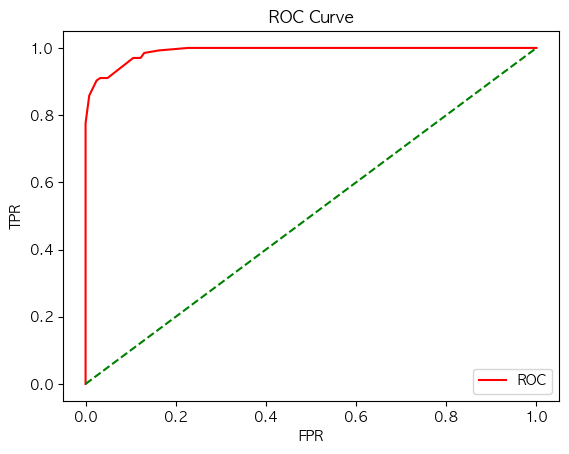

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       123
           1       0.91      0.97      0.94       134

    accuracy                           0.93       257
   macro avg       0.94      0.93      0.93       257
weighted avg       0.94      0.93      0.93       257



In [31]:
dt_best_es = grid_dt_clf.best_estimator_
print(grid_dt_clf.best_estimator_)

pred_dt = dt_best_es.predict(X_test)
print(acc_sc(y_test, pred_dt))
print('ROC AUC score = ', acc_sc(y_test, pred_dt))

dt_proba = dt_best_es.predict_proba(X_test)[:,1]
fper, tper, thresholds = roc_curve(y_test, dt_proba)
plot_roc_curve(fper, tper)

print(classification_report(y_test, pred_dt))

## SVM

In [32]:
start_time = time.time()
svm_clf = SVC(random_state=11,probability=True) #probalility=True proba생성을 위해 추가

svm_clf_param = {'C':[0.01,0.5,0.1,1,5,10],
                 'max_iter':[100,300,500,700,1000,1200,1500]}
               #   'kernel':['rbf','poly','sigmoid','linear'],
               #   'degree':[1,2,3,4,5,6],
               #   'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}


grid_svm_clf = GridSearchCV(svm_clf, param_grid=svm_clf_param, scoring='accuracy',cv=5)
grid_svm_clf.fit(X_train, y_train)

print('svm_clf의 최적 하이퍼 파라미터 : ', grid_svm_clf.best_params_)
print('svm_clf 정확도 : {:0.4f}'.format(grid_svm_clf.best_score_))
print("gridsearchCV SVM 수행시간 : {0:.2f}초".format(time.time() - start_time))

svm_clf의 최적 하이퍼 파라미터 :  {'C': 10, 'max_iter': 500}
svm_clf 정확도 : 0.9388
gridsearchCV SVM 수행시간 : 23.24초


SVC(C=10, max_iter=500, probability=True, random_state=11)
0.9377431906614786
ROC AUC score =  0.9377431906614786


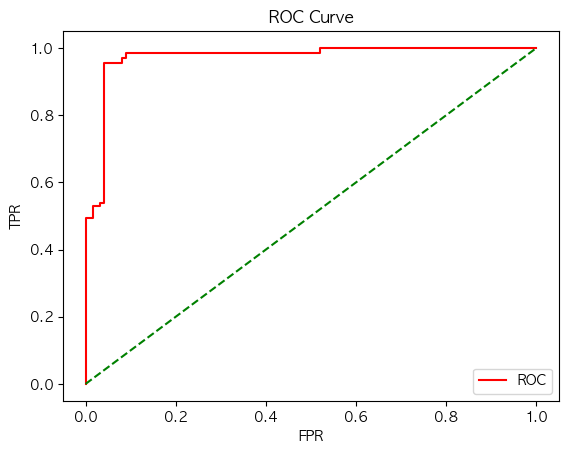

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       123
           1       0.93      0.96      0.94       134

    accuracy                           0.94       257
   macro avg       0.94      0.94      0.94       257
weighted avg       0.94      0.94      0.94       257



In [33]:
# 위의 param과 best_estimator를 비교
svm_best_es = grid_svm_clf.best_estimator_
print(grid_svm_clf.best_estimator_)

pred_svm = svm_best_es.predict(X_test)
print(acc_sc(y_test, pred_svm))

print('ROC AUC score = ', acc_sc(y_test, pred_svm))
svm_proba = svm_best_es.predict_proba(X_test)[:,1]
fper, tper, thresholds = roc_curve(y_test, svm_proba)
plot_roc_curve(fper, tper)

print(classification_report(y_test, pred_svm))

## GradientBoosting

In [34]:
start_time = time.time()
gbm_clf = GradientBoostingClassifier(random_state=11)

gbm_clf_param = {'n_estimators':[100,50],
                 'learning_rate':[0.05,0.01,0.1]}


grid_gbm_clf = GridSearchCV(gbm_clf, param_grid=gbm_clf_param, scoring='accuracy',cv=5)
grid_gbm_clf.fit(X_train, y_train)

print('gbm_clf의 최적 하이퍼 파라미터 : ', grid_gbm_clf.best_params_)
print('gbm_clf 정확도 : {:0.4f}'.format(grid_gbm_clf.best_score_))
print("gridsearchCV GBM 수행시간 : {0:.2f}초".format(time.time() - start_time))

gbm_clf의 최적 하이퍼 파라미터 :  {'learning_rate': 0.1, 'n_estimators': 100}
gbm_clf 정확도 : 0.9570
gridsearchCV GBM 수행시간 : 2.27초


GradientBoostingClassifier(random_state=11)
0.9610894941634242
ROC AUC score =  0.9610894941634242


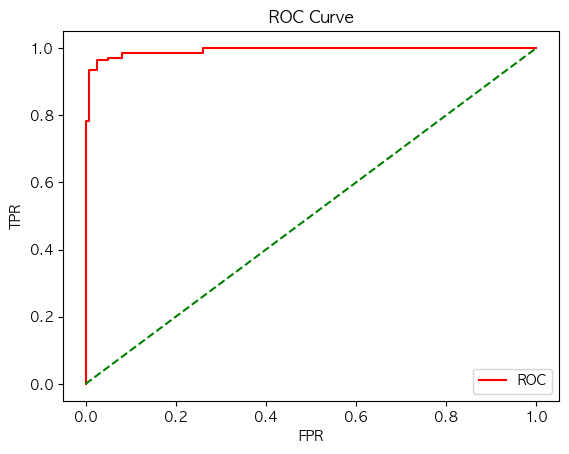

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       123
           1       0.96      0.96      0.96       134

    accuracy                           0.96       257
   macro avg       0.96      0.96      0.96       257
weighted avg       0.96      0.96      0.96       257



In [35]:
# 위의 param과 best_estimator를 비교
gbm_best_es = grid_gbm_clf.best_estimator_
print(grid_gbm_clf.best_estimator_)

pred_gbm = gbm_best_es.predict(X_test)
print(acc_sc(y_test, pred_gbm))

print('ROC AUC score = ', acc_sc(y_test, pred_gbm))
gbm_proba = gbm_best_es.predict_proba(X_test)[:,1]
fper, tper, thresholds = roc_curve(y_test, gbm_proba)
plot_roc_curve(fper, tper)

print(classification_report(y_test, pred_gbm))

## LightGBM

In [44]:
start_time = time.time()
lgbm_clf = LGBMClassifier(random_state=11)

lgbm_clf_param = {'num_leaves': [20,40,60,80,100],
                  'min_child_samples': [2,3,4,5],
                  'max_depth': [2,3],
                  'learning_rate':[0.05,0.1]}


grid_lgbm_clf = GridSearchCV(lgbm_clf, param_grid=lgbm_clf_param, scoring='accuracy',cv=5)
grid_lgbm_clf.fit(X_train, y_train)

print('lgbm_clf의 최적 하이퍼 파라미터 : ', grid_lgbm_clf.best_params_)
print('lgbm_clf 정확도 : {:0.4f}'.format(grid_lgbm_clf.best_score_))
print("gridsearchCV LGBM 수행시간 : {0:.2f}초".format(time.time() - start_time))

lgbm_clf의 최적 하이퍼 파라미터 :  {'learning_rate': 0.1, 'max_depth': 3, 'min_child_samples': 5, 'num_leaves': 20}
lgbm_clf 정확도 : 0.9453
gridsearchCV LGBM 수행시간 : 11.24초


LGBMClassifier(max_depth=3, min_child_samples=5, num_leaves=20, random_state=11)
0.9610894941634242
ROC AUC score =  0.9610894941634242


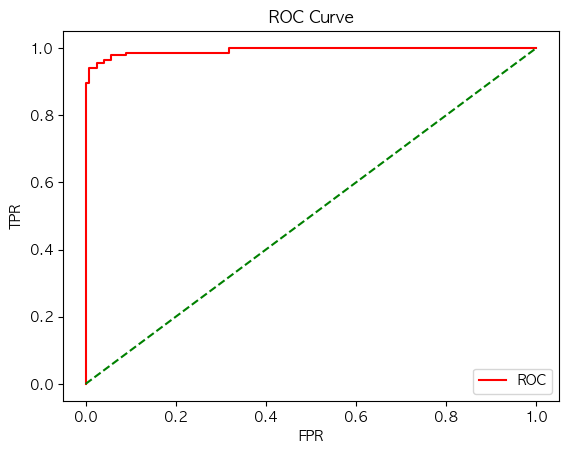

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       123
           1       0.96      0.96      0.96       134

    accuracy                           0.96       257
   macro avg       0.96      0.96      0.96       257
weighted avg       0.96      0.96      0.96       257



In [45]:
# 위의 param과 best_estimator를 비교
lgbm_best_es = grid_lgbm_clf.best_estimator_
print(grid_lgbm_clf.best_estimator_)

pred_lgbm = lgbm_best_es.predict(X_test)
print(acc_sc(y_test, pred_lgbm))

print('ROC AUC score = ', acc_sc(y_test, pred_lgbm))
lgbm_proba = lgbm_best_es.predict_proba(X_test)[:,1]
fper, tper, thresholds = roc_curve(y_test, lgbm_proba)
plot_roc_curve(fper, tper)

print(classification_report(y_test, pred_lgbm))

## XGBoost

In [46]:
start_time = time.time()
# gamma를 default(0)으로 하면 정확도가 1로 나와 과적합 방지를 위해 1로 설정 
xgb_clf = XGBClassifier(random_state=11,gamma=1,eval_metric='logloss')#objective='binary:logistic',random_state=11)

xgb_clf_param = { 'n_estimators': [100,200,300,400,500],
                  'max_depth': [2,3],
                  'learning_rate':[0.05,0.01,0.1]}


grid_xgb_clf = GridSearchCV(xgb_clf, param_grid=xgb_clf_param, scoring='accuracy',cv=5)
#evals = [(X_test, y_test)]
grid_xgb_clf.fit(X_train, y_train)
#                   early_stopping_rounds = 100,
#                   eval_set = evals,
#                   eval_metric='logloss')

print('xgb_clf의 최적 하이퍼 파라미터 : ', grid_xgb_clf.best_params_)
print('xgb_clf 정확도 : {:0.4f}'.format(grid_xgb_clf.best_score_))
print("gridsearchCV XGB 수행시간 : {0:.2f}초".format(time.time() - start_time))

xgb_clf의 최적 하이퍼 파라미터 :  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
xgb_clf 정확도 : 0.9192
gridsearchCV XGB 수행시간 : 24.79초


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=11,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
0.9377431906614786
ROC AUC score =  0.9377431906614786


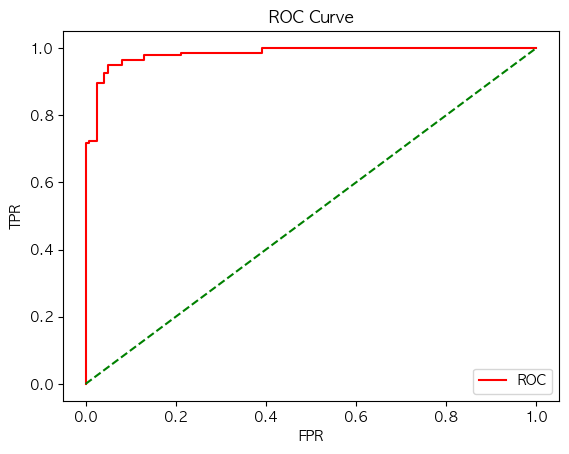

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       123
           1       0.93      0.96      0.94       134

    accuracy                           0.94       257
   macro avg       0.94      0.94      0.94       257
weighted avg       0.94      0.94      0.94       257



In [47]:
#evals = [(X_test, y_test)]
xgb_best_es = grid_xgb_clf.best_estimator_
print(grid_xgb_clf.best_estimator_)
xgb_best_es.fit(X_train,y_train)
#                  early_stopping_rounds = 50,
#                  eval_set = evals,
#                  eval_metric='logloss')

pred_xgb = xgb_best_es.predict(X_test)
print(acc_sc(pred_xgb,y_test))
print('ROC AUC score = ', acc_sc(y_test, pred_xgb))

xgb_proba = xgb_best_es.predict_proba(X_test)[:,1]
fper, tper, thresholds = roc_curve(y_test, xgb_proba)
plot_roc_curve(fper, tper)

print(classification_report(y_test, pred_xgb))

In [48]:
start_time = time.time()
#극단적인 시간차를 보기 위해 estimator = 2000선언
xgb = XGBClassifier(random_state=11,gamma=1,
                    learning_rate = 0.1,max_depth = 3,
                    n_estimators=2000)#,eval_metric='logloss')
# train X,y와 비교하기 위한 eval 선언 
evals = [(X_test, y_test)]
# early_stopping_rounds 평가 지표가 향상될 수 있는 반복 횟수 정의
# eval_set 성능 평가를 수행할 데이터 세트
# 조기 중단을 위한 평가 지표인 eval_metric
xgb.fit(X_train, y_train,
                   early_stopping_rounds = 10,
                   eval_set = evals,
                   eval_metric='logloss',
                   verbose=True)

pre_xgb = xgb.predict(X_test)
print(acc_sc(pre_xgb,y_test))
print('ROC AUC score = ', acc_sc(y_test, pre_xgb))
print("early_stop 적용 XGB 수행시간 : {0:.2f}초".format(time.time() - start_time))

[0]	validation_0-logloss:0.64684
[1]	validation_0-logloss:0.60766
[2]	validation_0-logloss:0.57488
[3]	validation_0-logloss:0.54712
[4]	validation_0-logloss:0.52209
[5]	validation_0-logloss:0.50129
[6]	validation_0-logloss:0.47949
[7]	validation_0-logloss:0.46136
[8]	validation_0-logloss:0.44638
[9]	validation_0-logloss:0.43291
[10]	validation_0-logloss:0.42096
[11]	validation_0-logloss:0.40835
[12]	validation_0-logloss:0.39993
[13]	validation_0-logloss:0.39164
[14]	validation_0-logloss:0.38303
[15]	validation_0-logloss:0.37400
[16]	validation_0-logloss:0.36734
[17]	validation_0-logloss:0.36139
[18]	validation_0-logloss:0.35559
[19]	validation_0-logloss:0.34908
[20]	validation_0-logloss:0.34296
[21]	validation_0-logloss:0.33843
[22]	validation_0-logloss:0.33303
[23]	validation_0-logloss:0.32869
[24]	validation_0-logloss:0.32453
[25]	validation_0-logloss:0.32078
[26]	validation_0-logloss:0.31558
[27]	validation_0-logloss:0.31251
[28]	validation_0-logloss:0.30956
[29]	validation_0-loglos

In [49]:
start_time = time.time()
#극단적인 시간차를 보기 위해 estimator = 2000선언
xgb = XGBClassifier(random_state=11,gamma=1,
                    learning_rate = 0.1,max_depth = 3,
                    n_estimators=2000,eval_metric='logloss')
xgb.fit(X_train, y_train)

pre_xgb = xgb.predict(X_test)
print(acc_sc(pre_xgb,y_test))
print('ROC AUC score = ', acc_sc(y_test, pre_xgb))
print("early_stop 미적용 XGB 수행시간 : {0:.2f}초".format(time.time() - start_time))

0.9377431906614786
ROC AUC score =  0.9377431906614786
early_stop 미적용 XGB 수행시간 : 1.25초


In [ ]:
fig, ax = plt.subplots()
plot_importance(xgb_best_es, ax=ax)

## 기본 스태킹

#### 각 girdsearchCV의 best_param_을 이용하여 모델에 최적 파라미터 선언

In [ ]:
# 모델 선언 및 파라미터 best_estimator로 조정
f_dt_clf = grid_dt_clf.best_estimator_#DecisionTreeClassifier(max_depth=6,random_state=11) #  min_samples_split=2, min_samples_leaf=1 생략 기본설정
f_svm_clf = grid_svm_clf.best_estimator_#SVC(C=10, max_iter=500,random_state=11)
f_gbm_clf = grid_gbm_clf.best_estimator_#GradientBoostingClassifier(max_depth=3,random_state=11)
f_lgbm_clf = grid_lgbm_clf.best_estimator_#LGBMClassifier(max_depth=3, min_child_samples=5, num_leaves=20,random_state=11)
f_xgb_clf = grid_xgb_clf.best_estimator_#XGBClassifier(eval_metric='mlogloss',
#                             objective='binary:logistic',
#                             random_state=11,
#                             learning_rate = 0.03,
#                             max_depth = 3,
#                             n_estimators = 500)

In [ ]:
# 각 모델에 fit
f_dt_clf.fit(X_train,y_train)
f_svm_clf.fit(X_train,y_train)
f_gbm_clf.fit(X_train,y_train)
f_lgbm_clf.fit(X_train,y_train)
f_xgb_clf.fit(X_train,y_train)

In [ ]:
# pred 선언 
pred_dt = f_dt_clf.predict(X_test)
pred_svm = f_svm_clf.predict(X_test)
pred_gbm = f_gbm_clf.predict(X_test)
pred_lgbm = f_lgbm_clf.predict(X_test)
pred_xgb = f_xgb_clf.predict(X_test)

In [ ]:
# 각 모델들의 pred_y값들을 하나의 데이터 프레임으로 만듦
f_pred = pd.DataFrame({'dt_pred': pred_dt,
                       'svm_pred': pred_svm,
                       'gbm_pred': pred_gbm,
                       'lgbm_pred': pred_lgbm,
                       'xgb_pred': pred_xgb})

In [ ]:
print('dt_clf 정확도 : {:0.4f}'.format(acc_sc(pred_dt,y_test)))
print('svm_clf 정확도 : {:0.4f}'.format(acc_sc(pred_svm,y_test)))
print('gbm_clf 정확도 : {:0.4f}'.format(acc_sc(pred_gbm,y_test)))
print('lgbm_clf 정확도 : {:0.4f}'.format(acc_sc(pred_lgbm,y_test)))
print('xgb_clf 정확도 : {:0.4f}'.format(acc_sc(pred_xgb,y_test)))

In [ ]:
#로지스틱 회귀 randomstate, C만 조정 penalty 는 l2 고정 
c = [0.01, 0.1, 1, 10, 100]
for i in range(len(c)):
    lr = LogisticRegression(C=c[i], random_state=11, penalty= 'l2')
    lr.fit(f_pred,y_test)
    lr_pred = lr.predict(f_pred)

    accuracy = acc_sc(y_test, lr_pred)
        
    print('--------------------------------------------------------------------')
    print('C={0:} 인 로지스틱 회귀 정확도 = {1:.4f}'.format(c[i], accuracy))
    print('ROC AUC Score = ', acc_sc(lr_pred,y_test))
    print(log_loss(y_test,lr_pred))
    print(classification_report(y_test, lr_pred))

## 스태킹 앙상블 사용 ( cv 기반 ) kfold

In [ ]:
def get_stacking_data(model, X_train_n, y_train_n, X_test_n,n_folds=5):
    kfold = KFold(n_splits=n_folds, shuffle=True, random_state=11)
    
    train_fold_predict = np.zeros((X_train_n.shape[0], 1))
    
    test_predict = np.zeros((X_test_n.shape[0], n_folds))
    print('model : ', model.__class__.__name__)
    
    for cnt, (train_index, valid_index) in enumerate(kfold.split(X_train_n)):
        X_tr = X_train_n.iloc[train_index]
        y_tr = y_train_n.iloc[train_index]
        X_validation = X_train_n.iloc[valid_index]
        
        model.fit(X_tr, y_tr)
        
        train_fold_predict[valid_index, :] = model.predict(X_validation).reshape(-1,1)
        
        test_predict[:, cnt] = model.predict(X_test_n)

    test_predict_mean = np.mean(test_predict, axis=1).reshape(-1,1)
    print("accuracy : ", acc_sc(test_predict[:, cnt], y_test))
    return train_fold_predict, test_predict_mean

In [ ]:
dt_train, dt_test = get_stacking_data(f_dt_clf, X_train, y_train, X_test)
svm_train, svm_test = get_stacking_data(f_svm_clf, X_train, y_train, X_test)
gbm_train, gbm_test = get_stacking_data(f_gbm_clf, X_train, y_train, X_test)
lgbm_train, lgbm_test = get_stacking_data(f_lgbm_clf, X_train, y_train, X_test)
xgb_train, xgb_test = get_stacking_data(f_xgb_clf, X_train, y_train, X_test)

In [ ]:
new_X_train = np.concatenate((dt_train,svm_train,gbm_train,lgbm_train,xgb_train),axis = 1)
new_X_test = np.concatenate((dt_test,svm_test,gbm_test,lgbm_test,xgb_test), axis=1)

In [ ]:
new_X_test

In [ ]:
print(new_X_train.shape, new_X_test.shape)

In [ ]:
#로지스틱 회귀 C만 조정, randomstate = 11, penalty = l2 고정
c = [0.01,0.5, 0.1, 1,10,100,1000]
for i in range(len(c)):
    lr = LogisticRegression(C=c[i],random_state=11, penalty='l2')
    lr.fit(new_X_train,y_train)
    lr_pred = lr.predict(new_X_test)
        
    accuracy = acc_sc(y_test, lr_pred)
        
    print('--------------------------------------------------------------------')
    print('C={0:} 인 로지스틱 회귀 정확도 = {1:.4f}'.format(c[i], accuracy))
    print('ROC AUC Score = ', acc_sc(lr_pred,y_test))
    #print(log_loss(y_test,lr_pred))
    print(classification_report(y_test, lr_pred))